### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook has been provided to you by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact us (elin_anna.topp at cs.lth.se) in case you need help!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: Use Jupyter Lab for programming, Jupyter Notebook for visualization (optional)
This command only enables the extension for jupyter notebook and not in jupyter lab! You can edit from the comfort of jupyter lab though and when you feel like using the widgets just go to

Menu bar > Help > Launch Classic Notebook

## Here we go... all imports go through the models

### Your job is in the files Localizer.py and RobotSimAndFilter.py

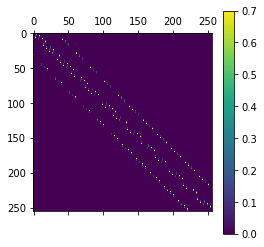

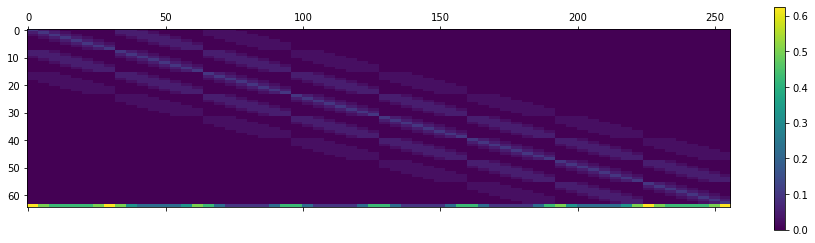

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.625 0.    0.    ... 0.    0.    0.   ]
 [0.    0.625 0.    ... 0.    0.    0.   ]
 [0.    0.    0.625 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.625 0.    0.   ]
 [0.    0.    0.    ... 0.    0.625 0.   ]
 [0.    0.    0.    ... 0.    0.    0.625]]
Robot moving
New Position: (6, 3)
Robot moved. New position: (6, 3)
Sensor detected position: None
Estimated position: ((6, 7), 0.00390625)
(False, 6, 5, 2, -1, -1, (6, 7), 0.00390625, 10.0, array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625,

In [1]:
# In models, all the actually interesting stuff is located, in Localizer and RobotSimAndFilter 
# you can write your own code. Note that the visualization assumes to have access to an object of type
# Localizer, i.e., you should definitely use that to implement the main "three step cycle" according to the 
# instructions.

from models import *

# Testing the models, e.g., for an 4x8 grid

states = StateModel( 8, 8)
loc = Localizer( states)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T()
sVecs.plot_o_diags()
print(sVecs.get_o_reading(0))
print(sVecs.get_o_reading(None))

print(loc.update())


### Write your own "main" here (without the viewer)

In [35]:
# In this cell, you can write your own "main" to run and evaluate your 
# implementation without using the visualisation below
from models import *

states = StateModel(8, 8)
loc = Localizer(states)
total_error = 0
total_moves = 100
for i in range(total_moves):
    ret, tsX, tsY, tsH, srX, srY, eX, eY, error, probs = loc.update(verbose=False)
    total_error += error

print('AVERAGE ERROR:', str(total_error / total_moves))

AVERAGE ERROR: 1.46


### Visualisation, both for transition and sensor probabilities and for actual runs of the filter, no changes needed

In [1]:
# In viewer, there is simply a file that handles all the thread based visualisation, no changes needed, 
# but feel free...

from viewer import *

ROWS = 8
COLS = 8

# the dashboard creates a state model of the dimensions given by ROWS and COLS, sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. All methods already 
# given in Localizer should thus keep their behaviour - otherwise the calls from Dashboard might result in 
# wrong output
dash = Dashboard.Dashboard(ROWS, COLS)
display(dash.db)
